<a href="https://colab.research.google.com/github/dmnjemuel/BAT-402-Estole-Manalo-J.-/blob/main/Clean_Water_Supply_and_End_Water_Scarcity_in_Philippines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clean Water Supply and End Water Scarcity in Philippines**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from yellowbrick.features import rank1d

%matplotlib inline

# **Uploading the Datasets**

In [ ]:
WaterQuality = 'https://raw.githubusercontent.com/dreibit/BAT-402-Estole-Manalo-J.-/main/Datasets/waterQuality1.csv'

# **Reading and Printing Datasets**

In [ ]:
waterquality = pd.read_csv(WaterQuality)

In [ ]:
df = pd.read_csv(WaterQuality)
print(df)

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# **Checking Data types**

In [ ]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

# **Changing Data Types**

In [ ]:
df['ammonia'] = df['ammonia'].replace('#NUM!',pd.np.nan)
df['ammonia'] = df['ammonia'].astype('float')

<ipython-input-7-32159bcdf8a4>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['ammonia'] = df['ammonia'].replace('#NUM!',pd.np.nan)


In [ ]:
df['is_safe'] = df['is_safe'].replace('#NUM!',pd.np.nan)
df['is_safe'] = df['is_safe'].astype('float')
df['is_safe'].dtype

<ipython-input-8-21268fc24f84>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['is_safe'] = df['is_safe'].replace('#NUM!',pd.np.nan)


dtype('float64')

In [ ]:
df.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float64
dtype: object

In [ ]:
df.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,...,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225773,0.046783,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,...,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455,-0.123362
barium,0.294145,0.070099,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,...,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440,0.090858
cadmium,-0.099911,-0.006422,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,...,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633,-0.256034
chloramine,0.369309,0.104775,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,...,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658,0.186704
chromium,0.353218,0.124782,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,...,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526,0.182306
copper,0.168612,0.015953,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,...,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978,0.029498
flouride,-0.009784,-0.028221,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,...,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792,0.006550
bacteria,-0.078238,0.063603,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,...,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839,-0.022077


# **Plotting**

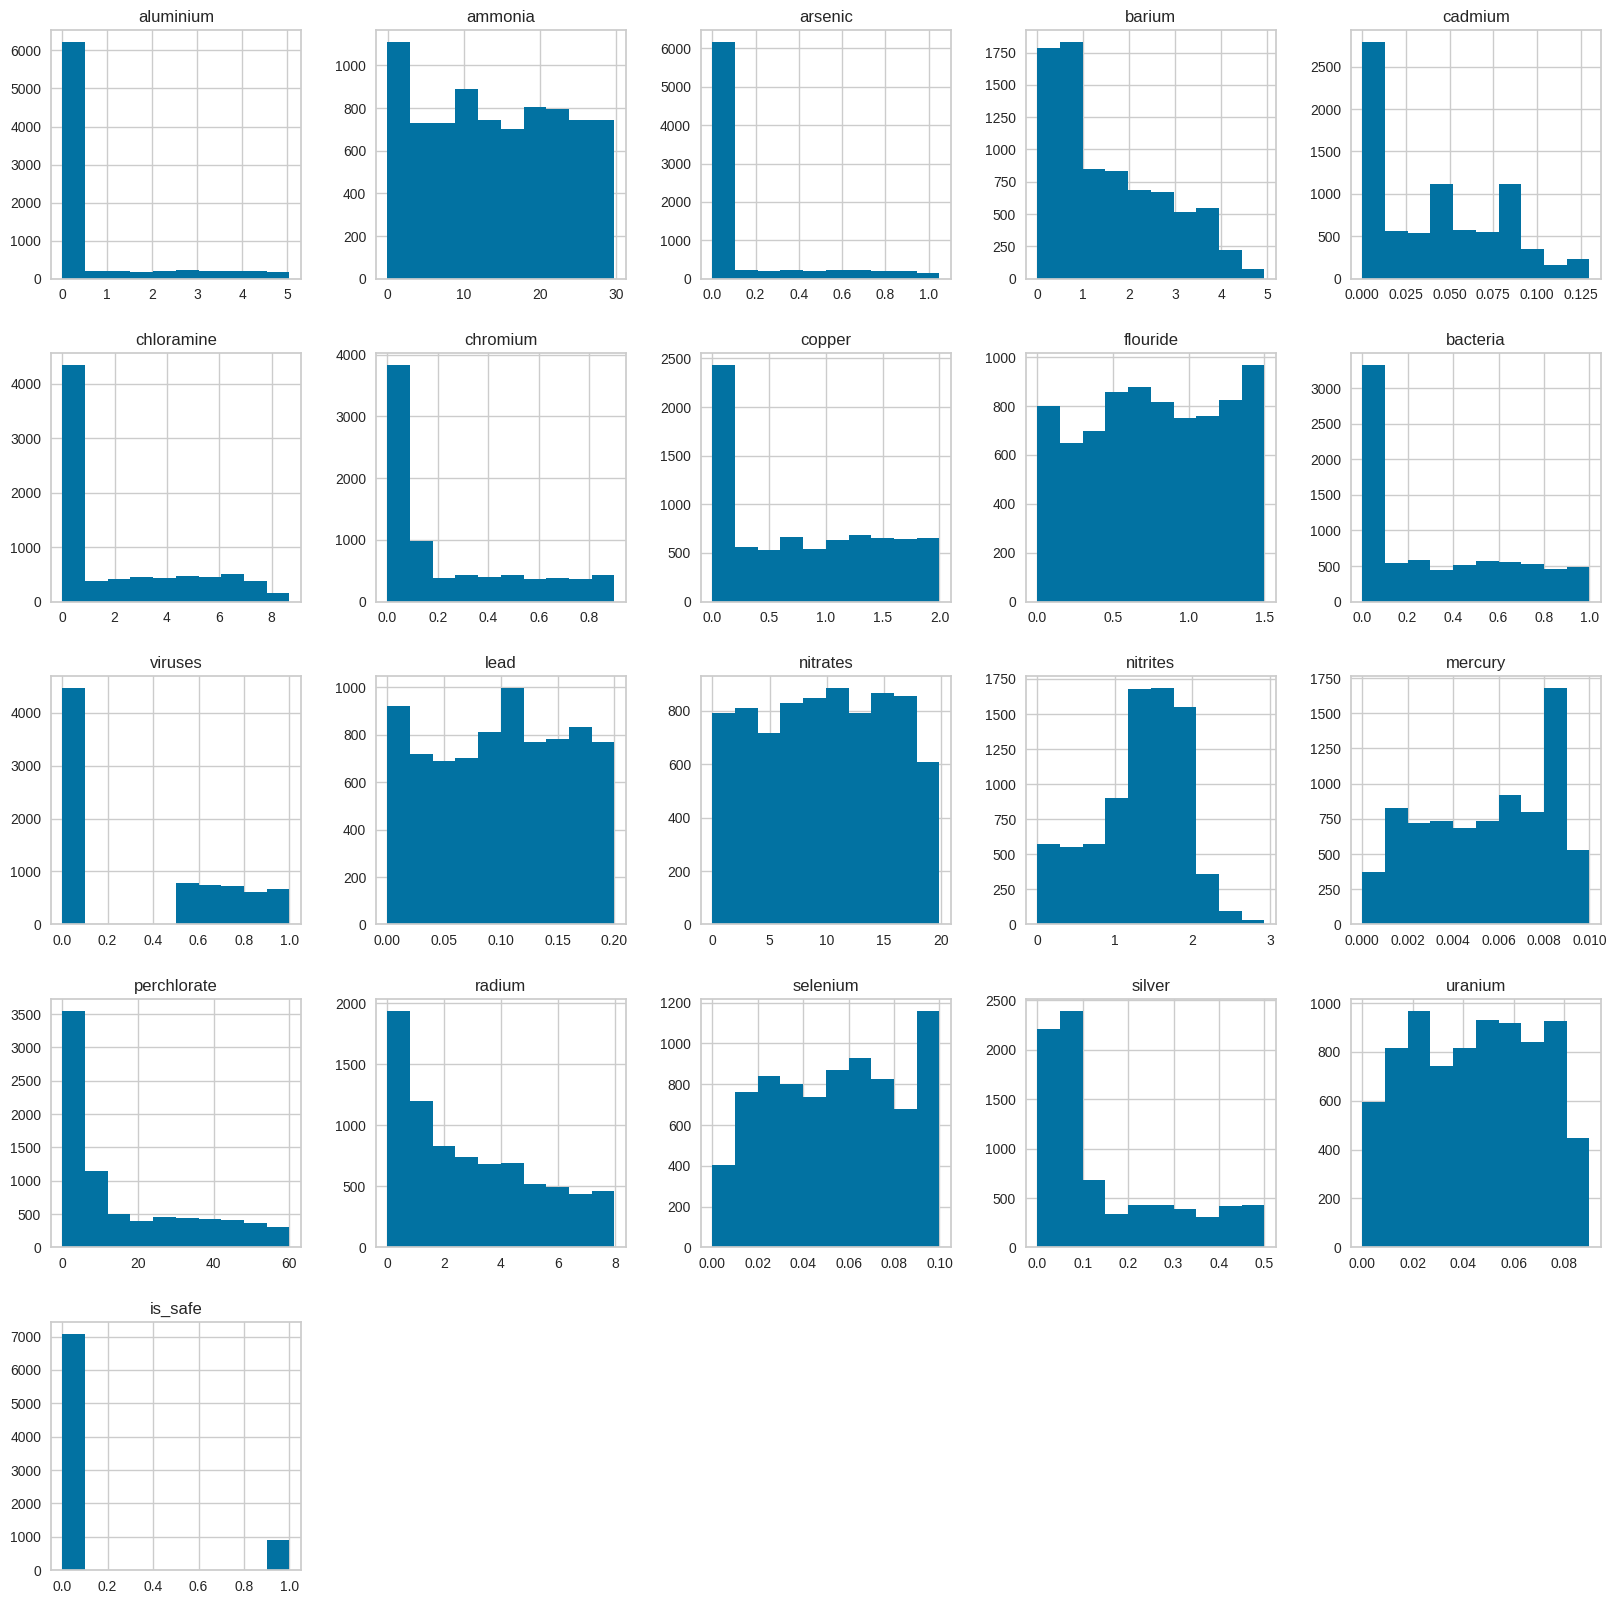

In [ ]:
df.hist(figsize=(20,20))
plt.show()

In [ ]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7996.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7996.000000
mean,0.666158,14.278212,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114057
std,1.265145,8.878930,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [ ]:
df['ammonia']= df['ammonia'].fillna(0)
df['is_safe']= df['is_safe'].fillna(0)

In [ ]:
from scipy import stats

numeric_cols = df.select_dtypes(include='float').columns.tolist()
z_scores = stats.zscore(df[numeric_cols])

threshold = 3

outlier_indices = np.where(np.abs(z_scores) > threshold)

print(outlier_indices)

(array([  13,   18,   29,   35,   65,   68,   85,   87,  102,  104,  109,
        153,  157,  160,  167,  196,  212,  242,  295,  298,  318,  331,
        337,  341,  360,  375,  377,  380,  381,  383,  402,  406,  408,
        435,  440,  448,  478,  490,  493,  501,  502,  505,  526,  532,
        536,  550,  562,  563,  586,  599,  600,  610,  613,  647,  649,
        654,  656,  661,  693,  703,  728,  737,  739,  744,  750,  752,
        768,  770,  795,  801,  831,  846,  853,  857,  864,  870,  890,
        892,  900,  907,  916,  934,  941,  958,  963,  977,  980,  989,
        998, 1013, 1016, 1018, 1028, 1029, 1035, 1039, 1052, 1056, 1064,
       1065, 1068, 1073, 1085, 1087, 1094, 1095, 1102, 1104, 1104, 1109,
       1109, 1113, 1115, 1117, 1125, 1127, 1140, 1142, 1153, 1153, 1155,
       1157, 1158, 1159, 1160, 1162, 1165, 1167, 1183, 1184, 1193, 1196,
       1209, 1212, 1225, 1227, 1235, 1242, 1243, 1247, 1271, 1287, 1289,
       1295, 1298, 1299, 1305, 1308, 1315, 1318, 1

In [ ]:
clean_df = df.drop(outlier_indices[0])

In [ ]:
np.var(df).sum()

438.90765601783244

In [ ]:
np.var(clean_df).sum()

430.9618407135818

In [ ]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7617.0,0.551070,1.094488,0.00,0.040,0.070,0.190,4.46
ammonia,7617.0,14.208627,8.887790,-0.08,6.500,14.020,22.070,29.84
arsenic,7617.0,0.137298,0.215551,0.00,0.020,0.050,0.090,0.91
barium,7617.0,1.518657,1.199142,0.00,0.540,1.110,2.400,4.94
cadmium,7617.0,0.042255,0.035631,0.00,0.008,0.040,0.070,0.13
chloramine,7617.0,2.077671,2.538389,0.00,0.090,0.460,4.050,8.68
chromium,7617.0,0.237722,0.267733,0.00,0.040,0.090,0.410,0.90
copper,7617.0,0.800853,0.653785,0.00,0.090,0.750,1.380,2.00
flouride,7617.0,0.771701,0.434225,0.00,0.410,0.770,1.160,1.50
bacteria,7617.0,0.320326,0.329297,0.00,0.000,0.220,0.610,1.00


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.00,0.040,0.070,0.280,5.05
ammonia,7999.0,14.272857,8.881569,-0.08,6.560,14.130,22.130,29.84
arsenic,7999.0,0.161445,0.252590,0.00,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.00,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.00,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.00,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.00,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.00,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.00,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.00,0.000,0.220,0.610,1.00


In [ ]:
clean_var = np.var(clean_df)
print(clean_var)
print(clean_var.sum())

aluminium        1.197746
ammonia         78.982438
arsenic          0.046456
barium           1.437752
cadmium          0.001269
chloramine       6.442572
chromium         0.071672
copper           0.427379
flouride         0.188526
bacteria         0.108422
viruses          0.143127
lead             0.003359
nitrates        30.590101
nitrites         0.333542
mercury          0.000009
perchlorate    305.571615
radium           5.295387
selenium         0.000827
silver           0.020083
uranium          0.000724
is_safe          0.098833
dtype: float64
430.9618407135818


# **Heat Map**

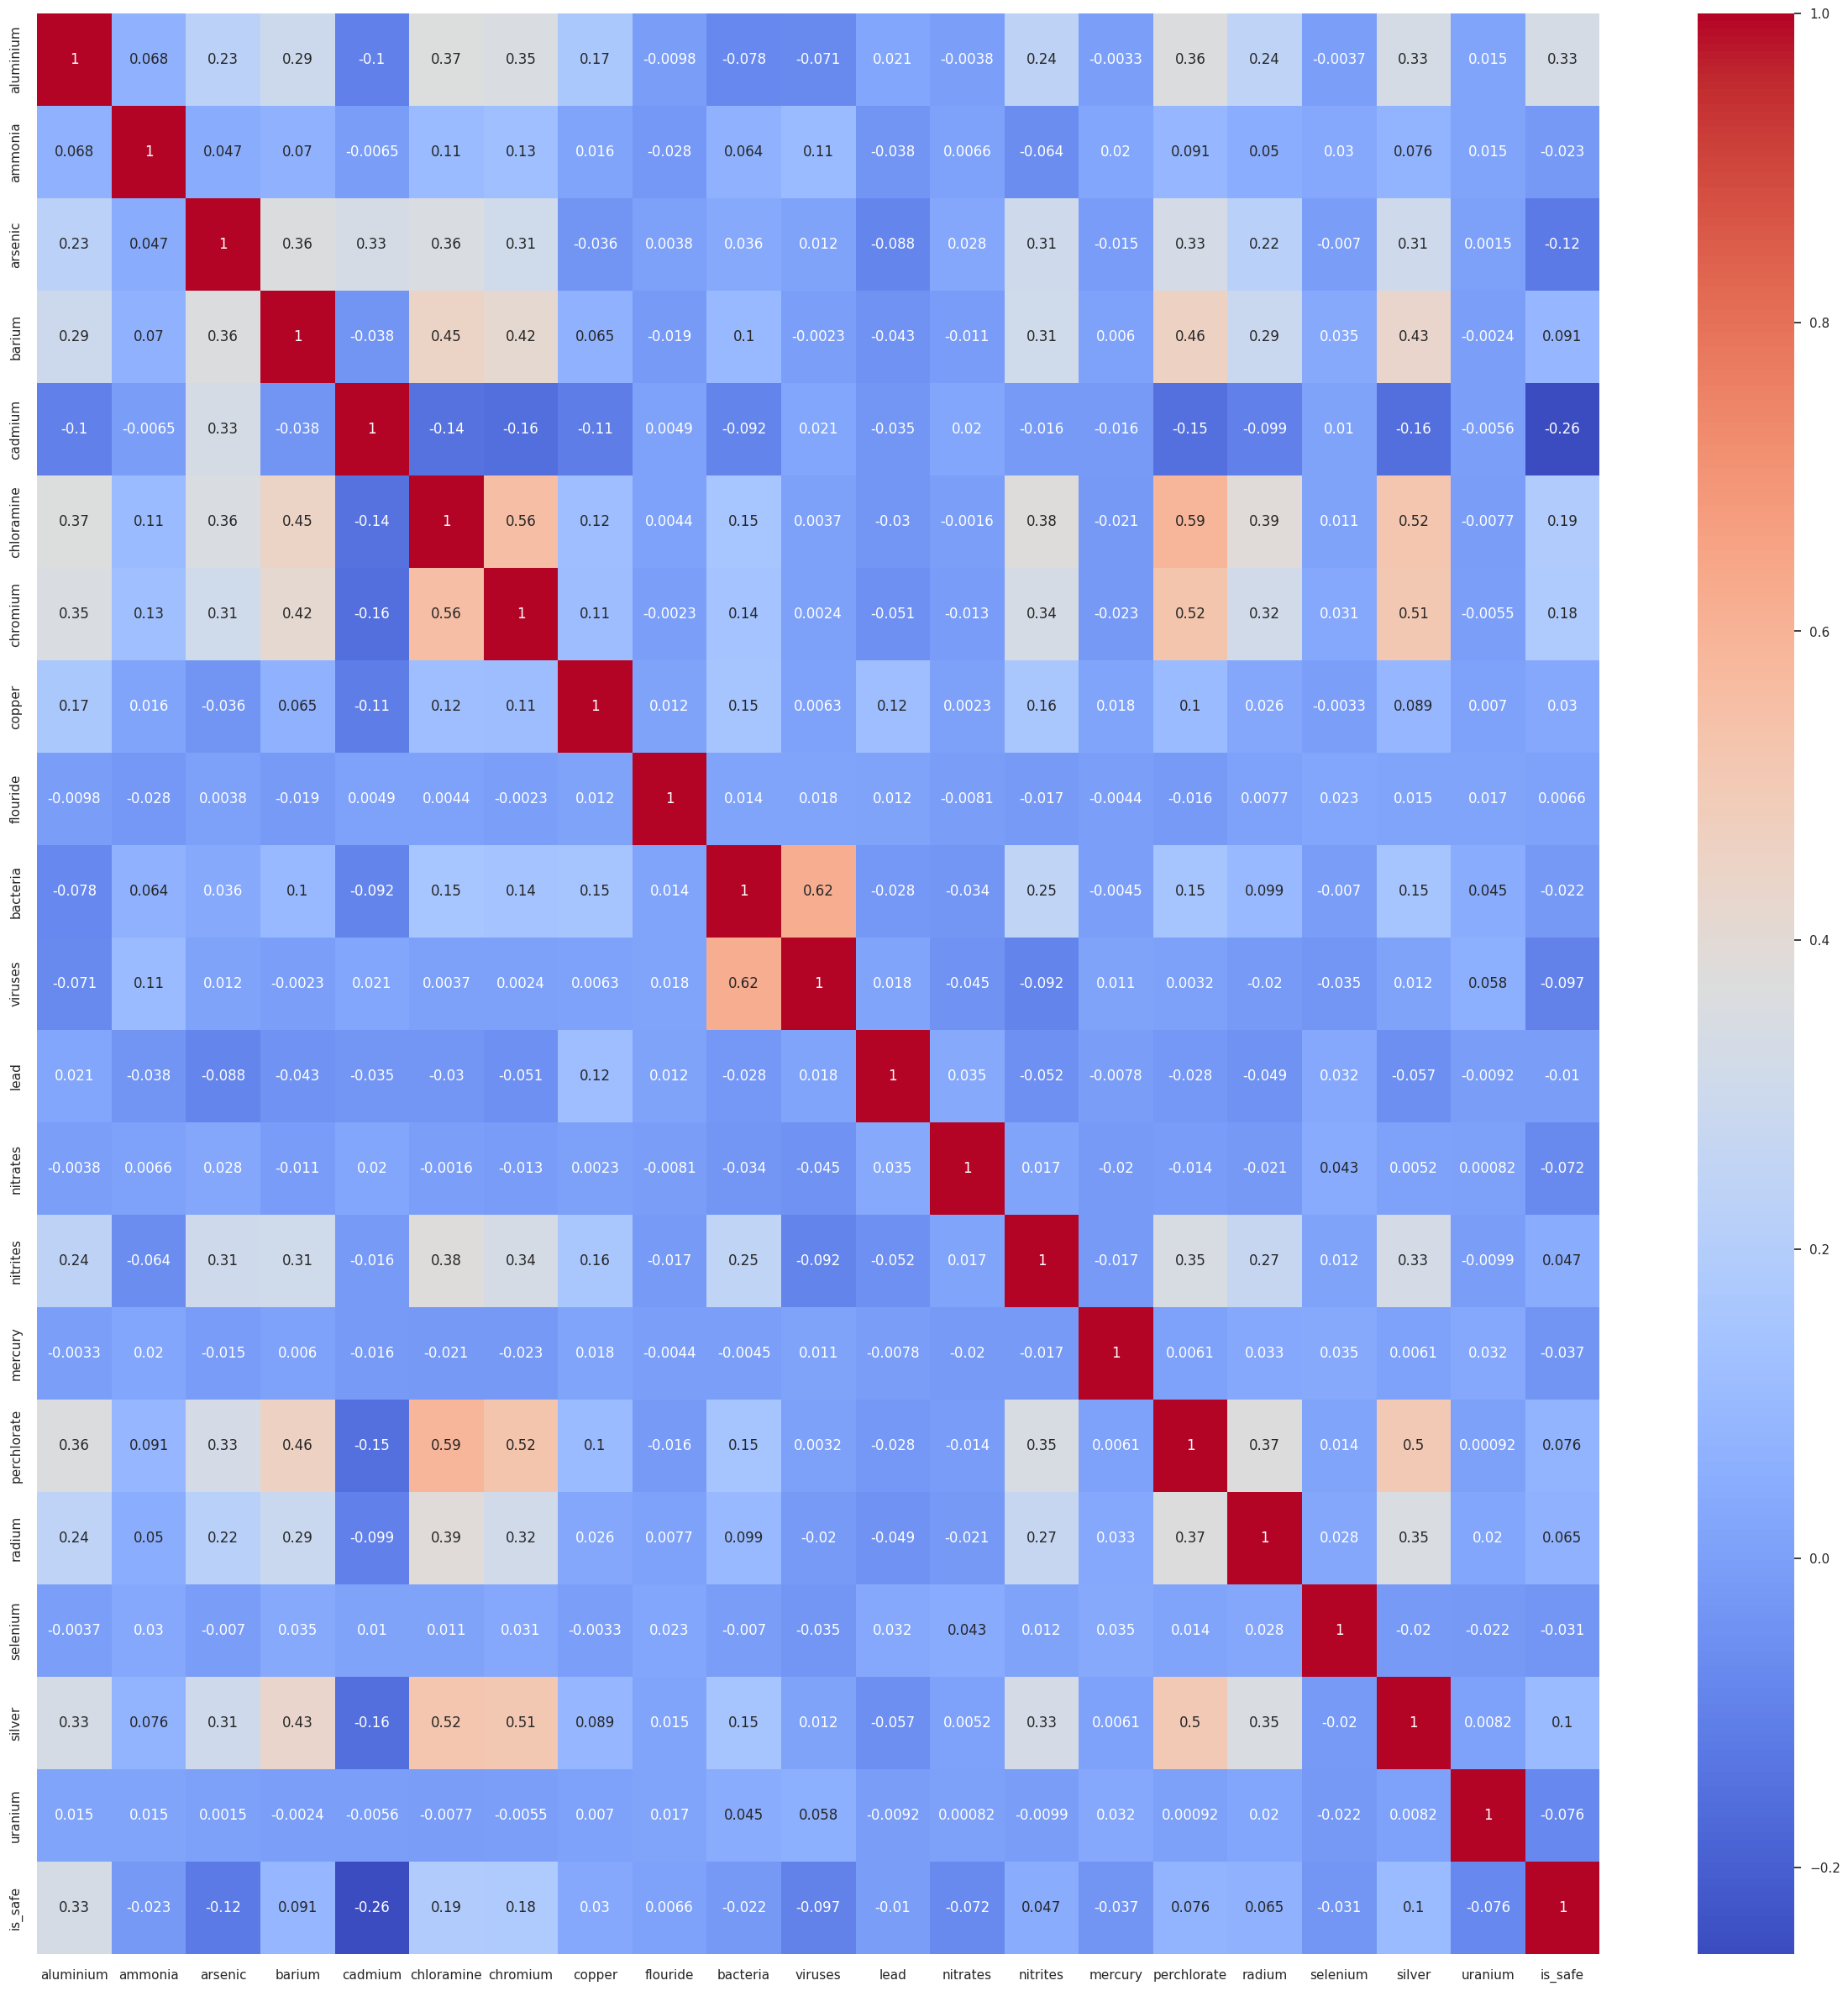

In [ ]:
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
sns.set (rc = {'figure.figsize':(30,30)})

In [ ]:
target='is_safe'

In [ ]:
num_col=[]
for col in df.select_dtypes(exclude='object'):
    if(col!=target):
        print(f"{col:30} ----> {df[col].nunique():10} unique values")
        num_col.append(col)

aluminium                      ---->        495 unique values
ammonia                        ---->       2563 unique values
arsenic                        ---->        107 unique values
barium                         ---->        480 unique values
cadmium                        ---->         23 unique values
chloramine                     ---->        812 unique values
chromium                       ---->         91 unique values
copper                         ---->        201 unique values
flouride                       ---->        151 unique values
bacteria                       ---->        101 unique values
viruses                        ---->         61 unique values
lead                           ---->        200 unique values
nitrates                       ---->       1803 unique values
nitrites                       ---->        280 unique values
mercury                        ---->         11 unique values
perchlorate                    ---->       2999 unique values
radium  

In [ ]:
print(num_col),len(num_col)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']


(None, 20)

# **Plotting Line Chart of is_safe**

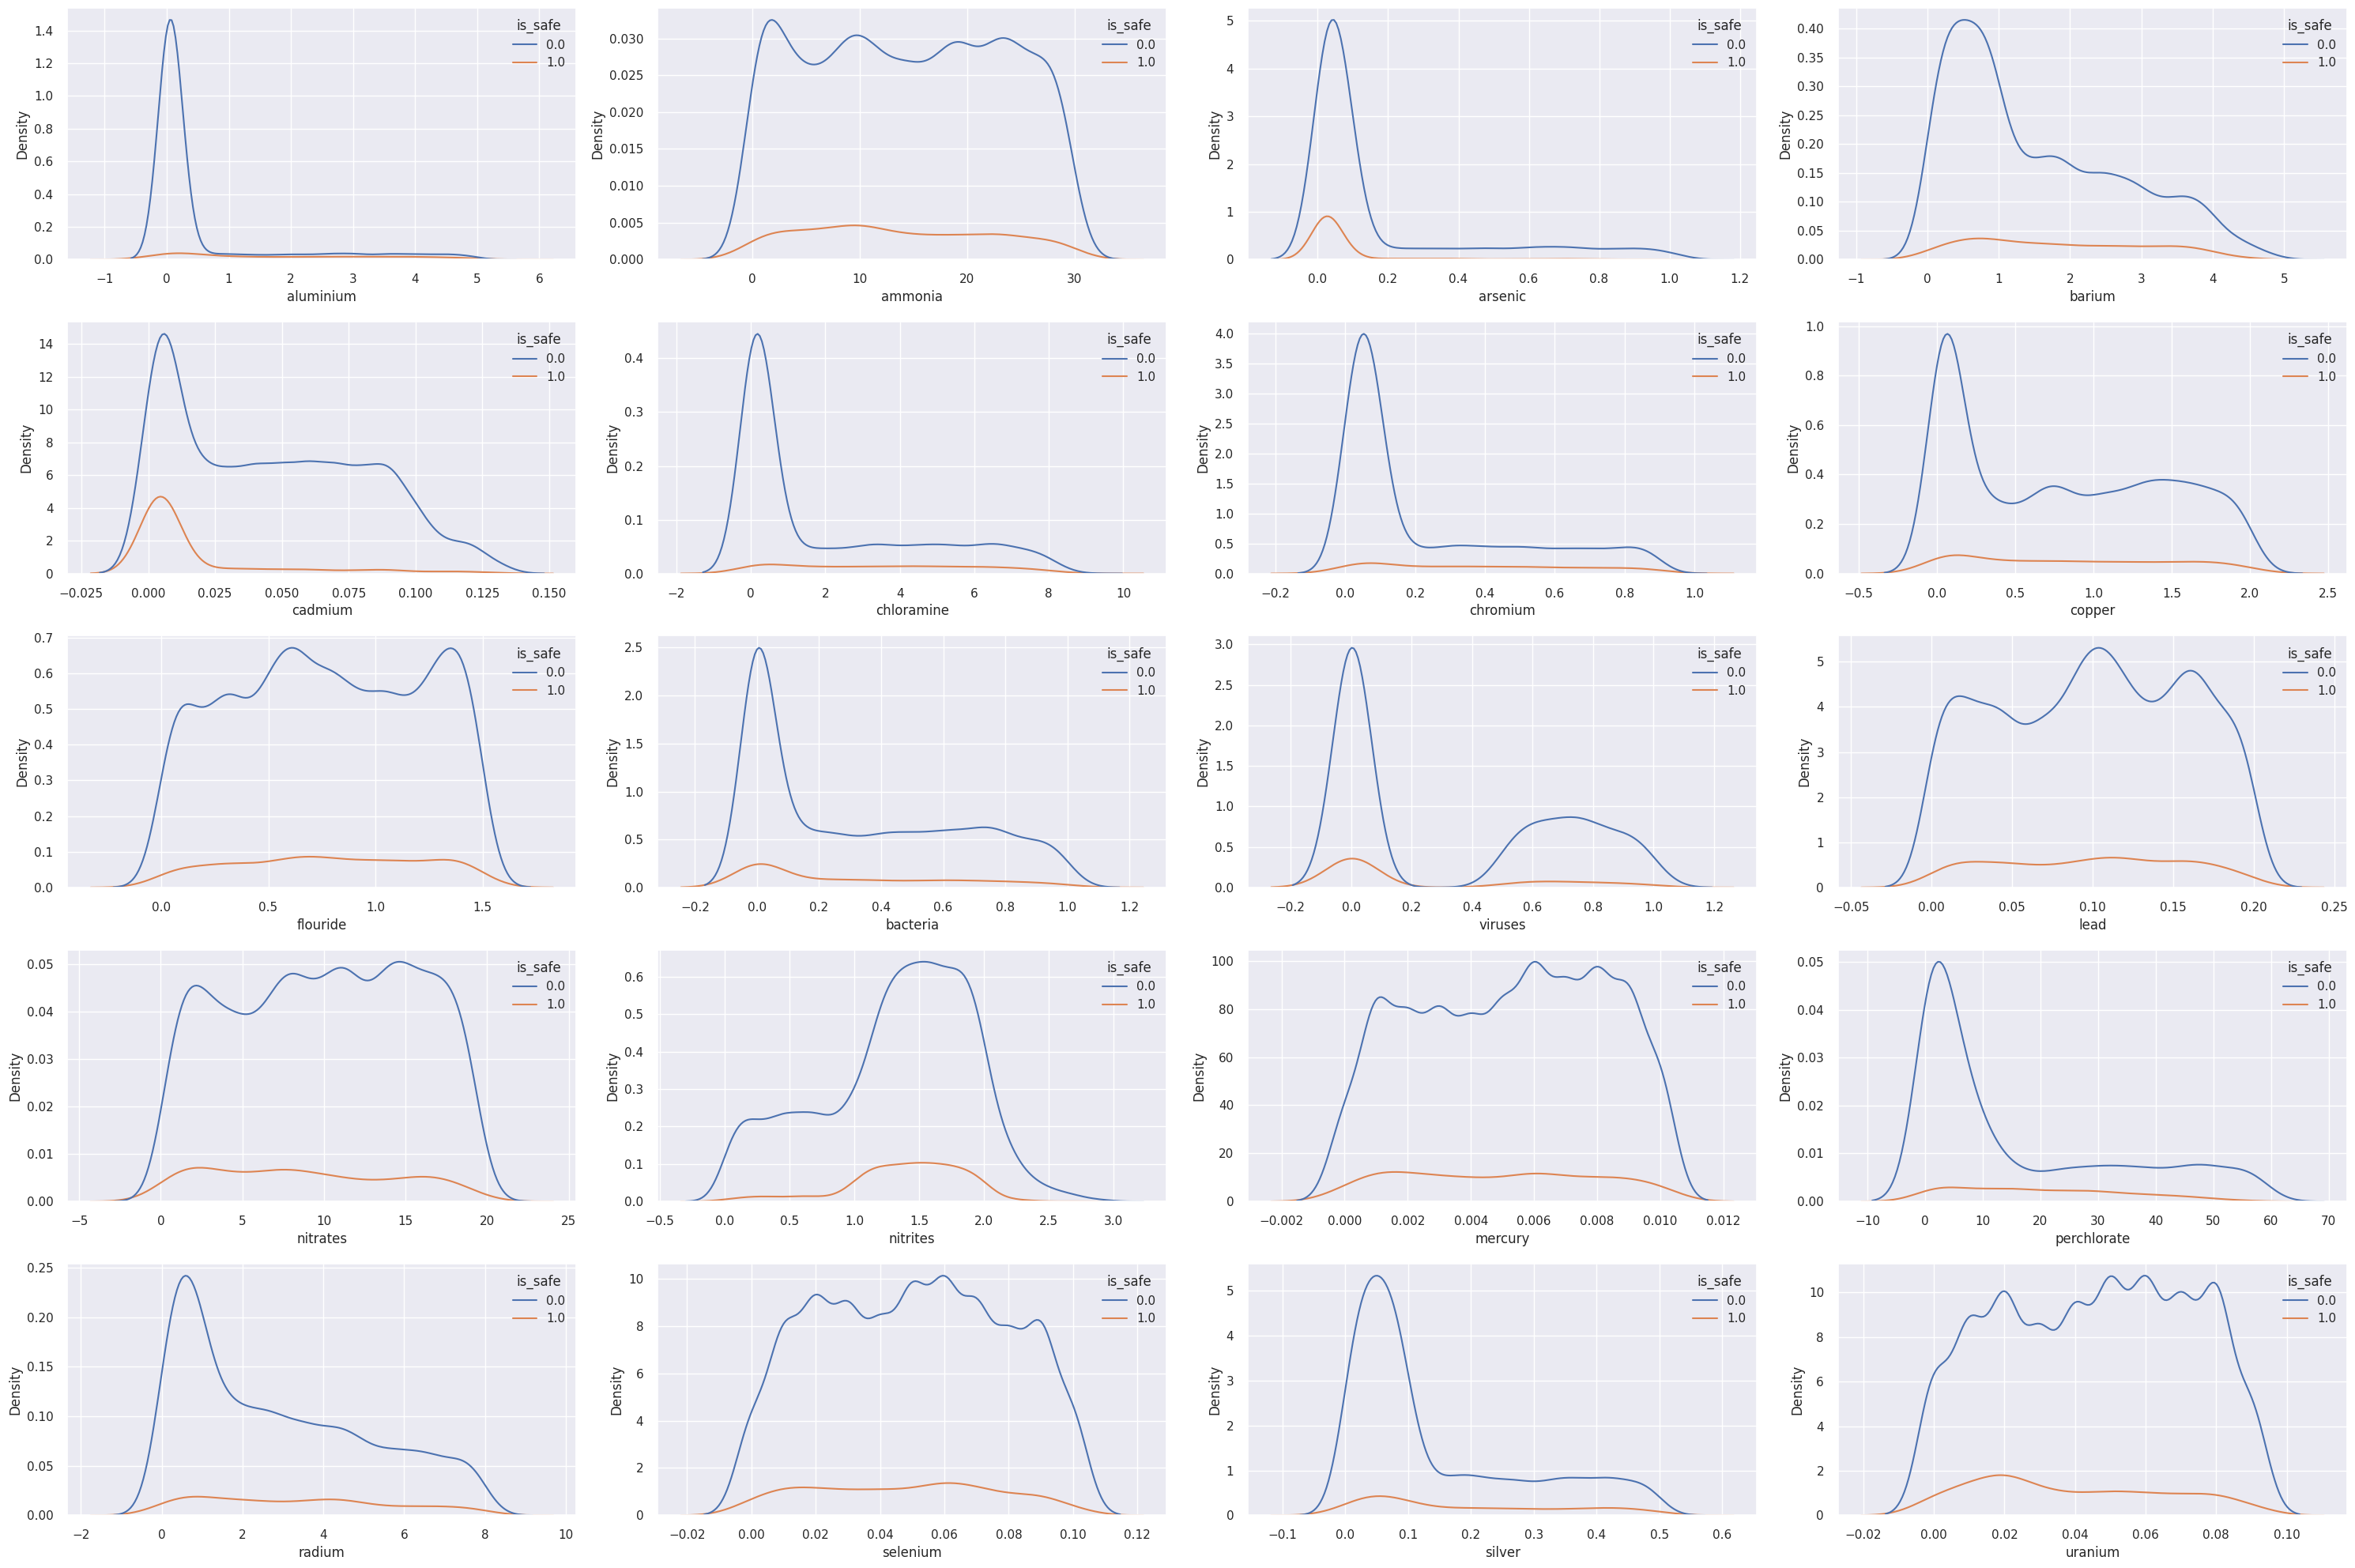

In [ ]:
plt.figure(figsize=(30,20))
j=1
for i,columns in enumerate(num_col):
    plt.subplot(5,4,j)
    sns.kdeplot(x=columns,data=df,hue=target)
    j+=1
plt.tight_layout()

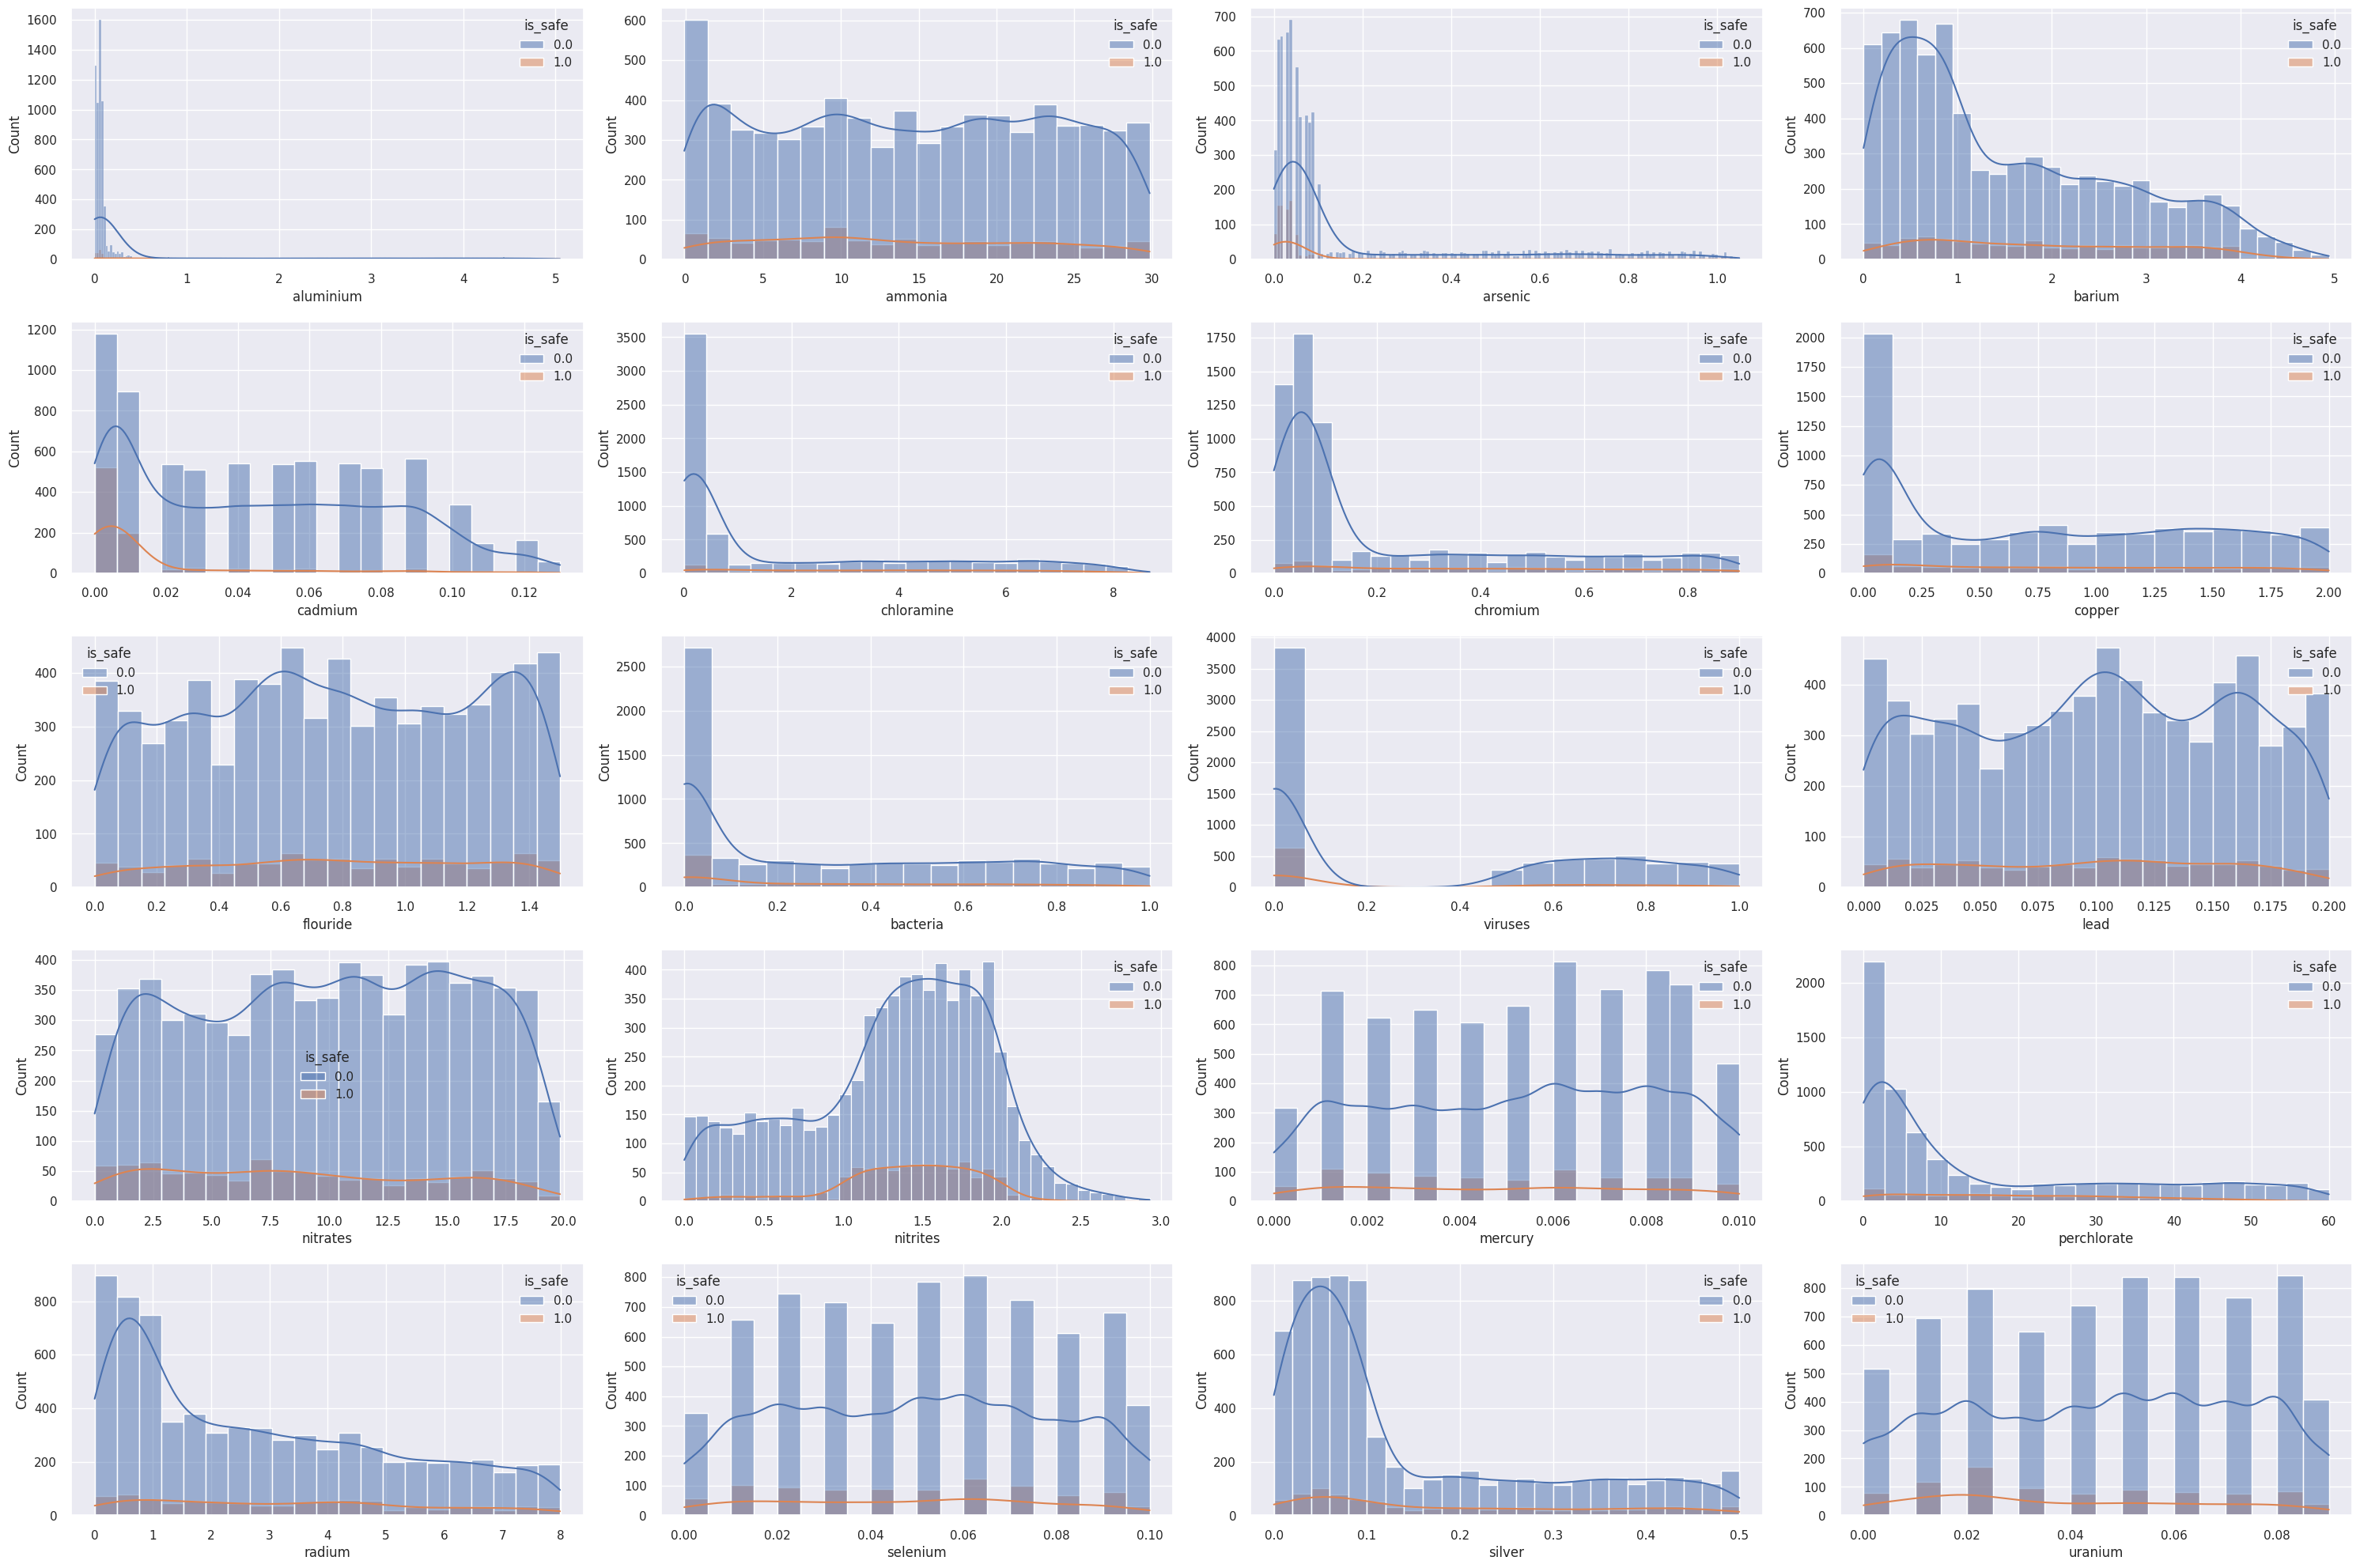

In [ ]:
plt.figure(figsize=(30,20))
j=1
for i,columns in enumerate(num_col):
    plt.subplot(5,4,j)
    sns.histplot(x=columns,data=df,kde=True,hue=target)
    j+=1
plt.tight_layout()

# **Ranking of 21 Features**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


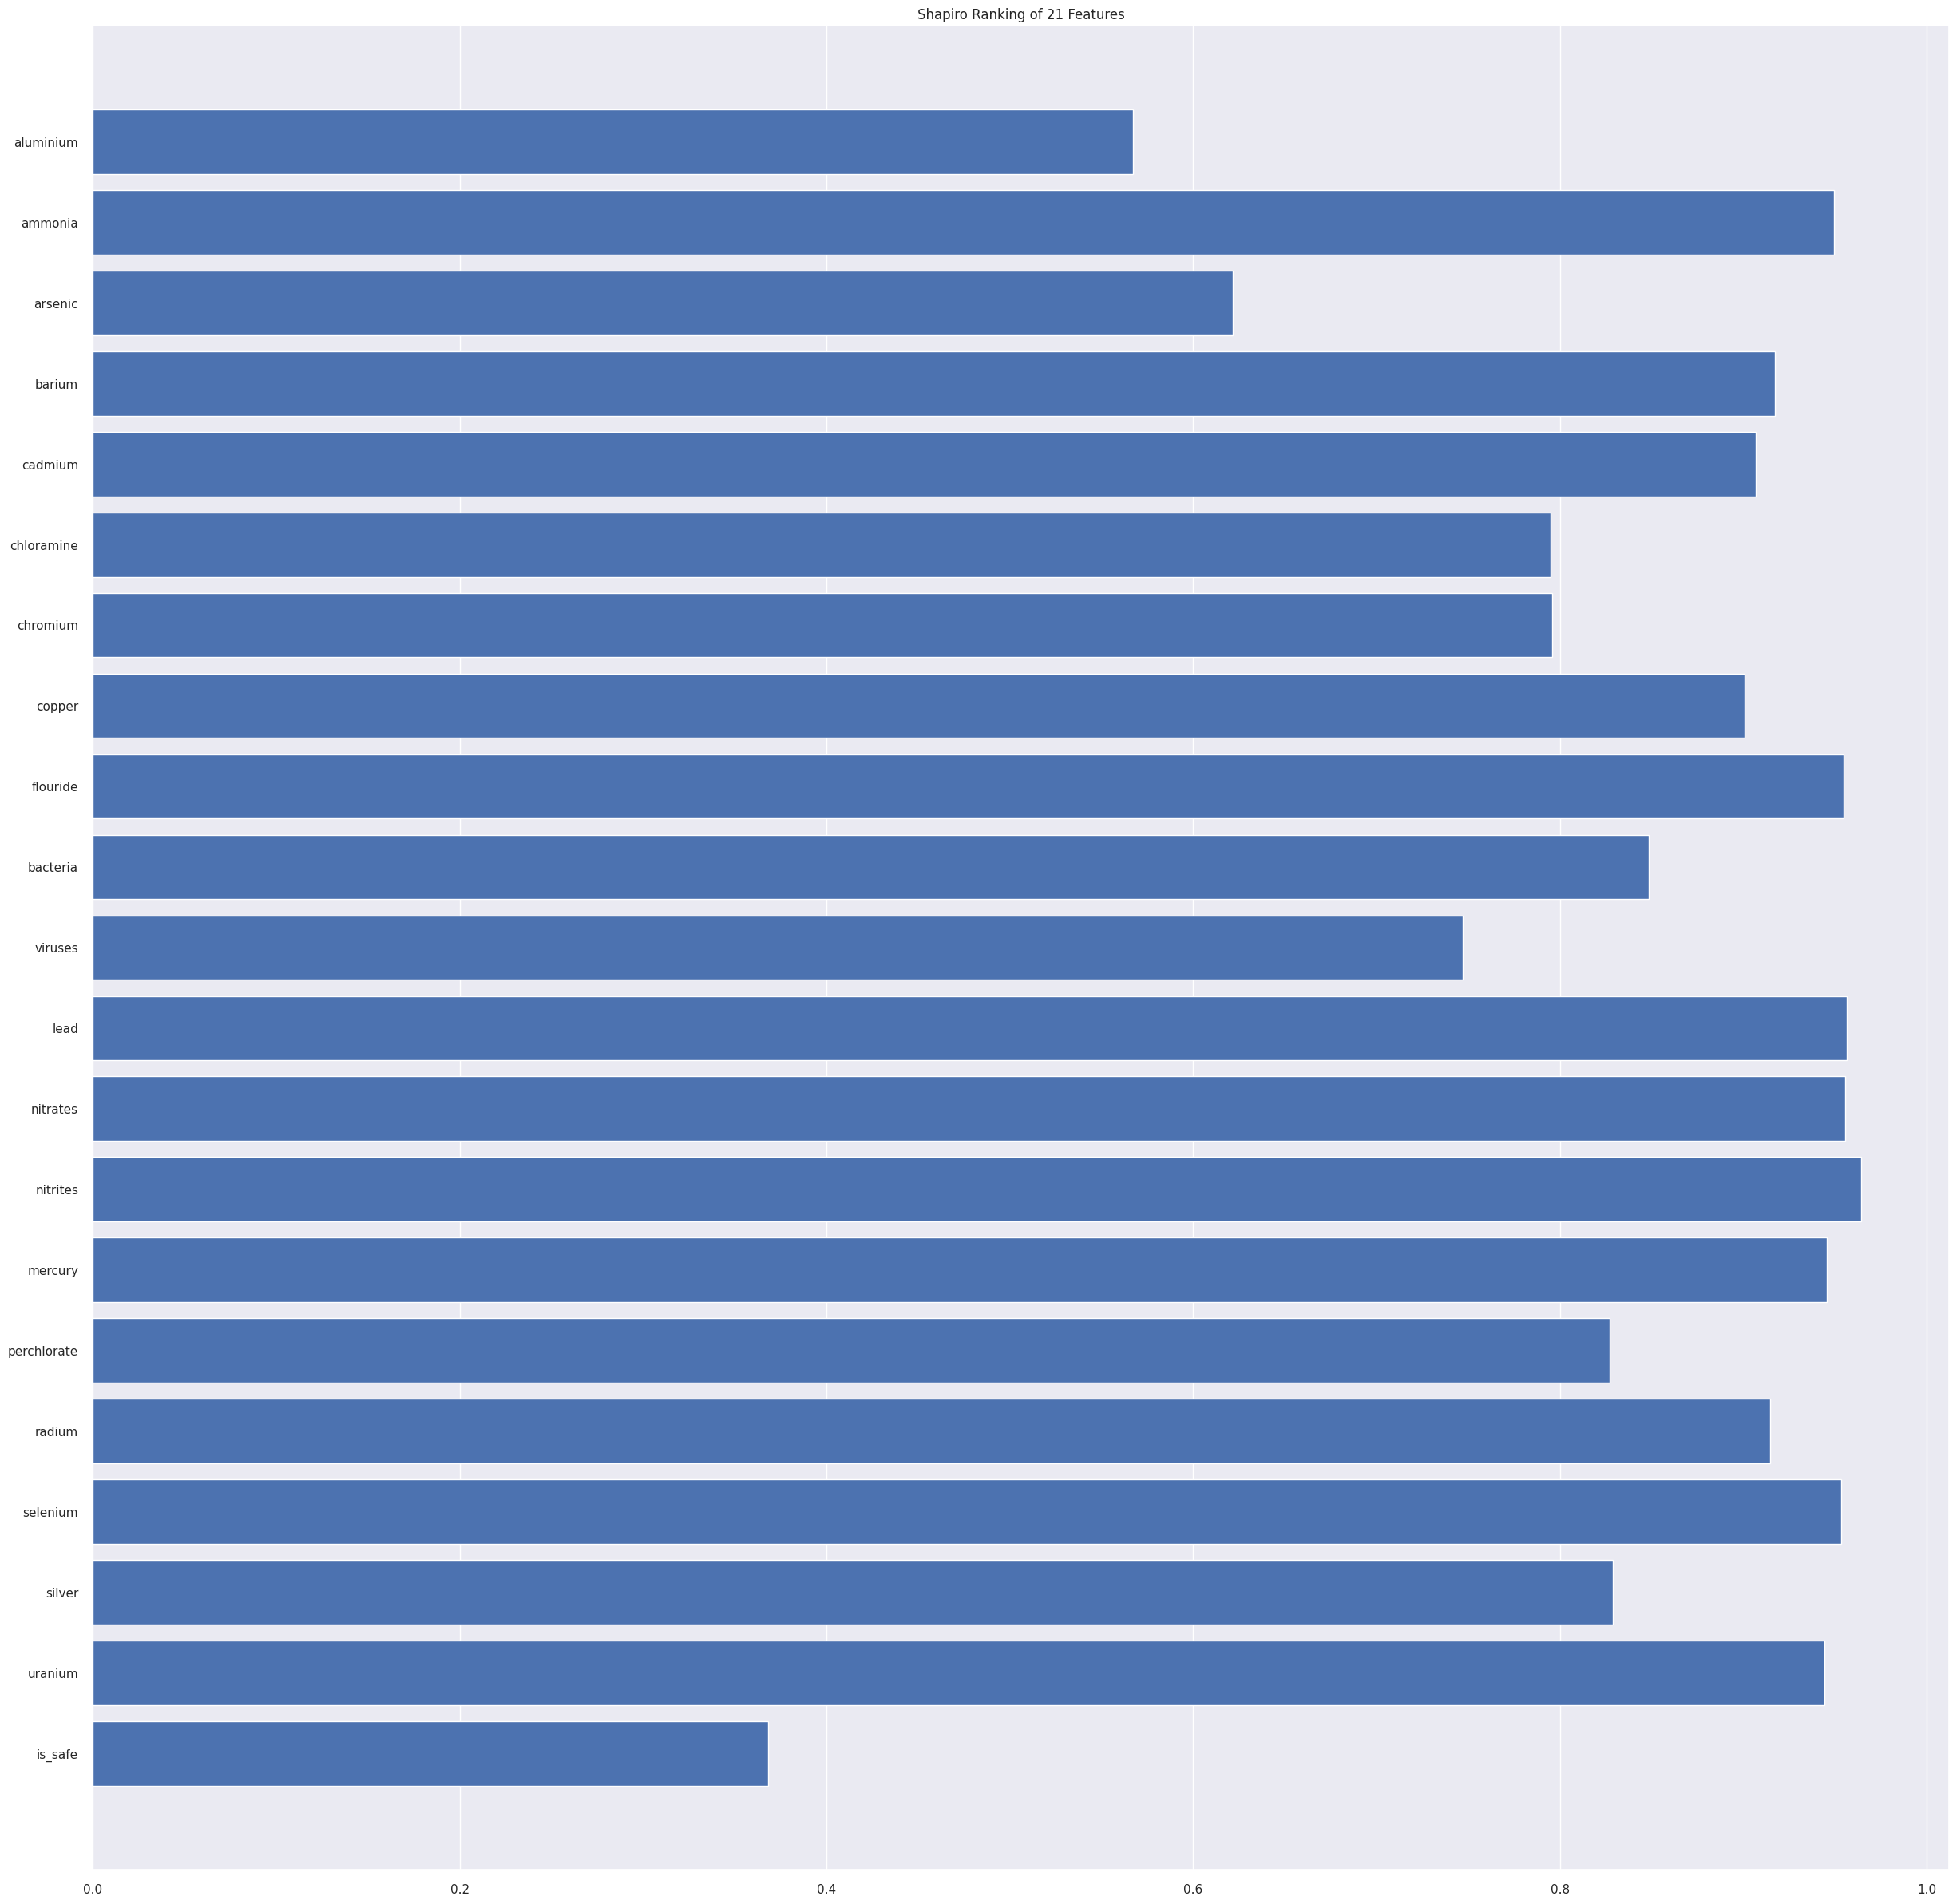

In [ ]:
rank1d(df);

In [ ]:
median, sd = df.median(axis=0), np.std(df)

threshold = 2.5
outliers = df[np.abs((df - median) / sd) > threshold]

df_clean = df[np.abs((df - median) / sd) <= threshold]

print("Number of outliers:", len(outliers))
print("Cleaned dataset:", df_clean)

print("Original dataset:\n", df)
print("Cleaned dataset:\n", df_clean)


Number of outliers: 7999
Cleaned dataset:       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35       NaN   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001         NaN      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead 

In [ ]:
df.corr().sum()

aluminium      3.757212
ammonia        1.731763
arsenic        3.612989
barium         4.266991
cadmium        0.010777
chloramine     4.987936
chromium       4.667806
copper         2.061086
flouride       1.033567
bacteria       2.699713
viruses        1.529758
lead           0.713987
nitrates       0.913704
nitrites       3.739980
mercury        0.996581
perchlorate    4.731458
radium         3.591532
selenium       1.175226
silver         4.528449
uranium        1.081590
is_safe        1.373944
dtype: float64

In [ ]:
df_clean.corr().sum()

aluminium      3.285182
ammonia        1.727403
arsenic        3.297085
barium         4.043820
cadmium        0.211821
chloramine     4.859483
chromium       4.531388
copper         1.981628
flouride       1.018038
bacteria       2.727842
viruses        1.681374
lead           0.758744
nitrates       0.989983
nitrites       3.599377
mercury        1.064757
perchlorate    4.639752
radium         3.476228
selenium       1.197892
silver         4.288417
uranium        1.110002
is_safe        0.000000
dtype: float64

In [ ]:
df_clean.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.057526,0.181275,0.263313,-0.083639,0.367876,0.345032,0.149835,0.000309,-0.052027,...,0.017581,0.002957,0.210958,-0.005996,0.363592,0.218897,-0.018030,0.312747,-0.009465,NaN
ammonia,0.057526,1.000000,0.053239,0.066404,-0.006538,0.094571,0.109029,0.016149,-0.027908,0.063800,...,-0.037558,0.006603,-0.063181,0.020300,0.090498,0.050058,0.029804,0.083499,0.014581,NaN
arsenic,0.181275,0.053239,1.000000,0.267970,0.317067,0.312024,0.294881,-0.040042,0.012145,0.019981,...,-0.096453,0.020273,0.258117,0.007396,0.270945,0.175700,-0.006865,0.244108,-0.002395,NaN
barium,0.263313,0.066404,0.267970,1.000000,-0.074290,0.466100,0.409552,0.077018,-0.018013,0.102511,...,-0.030036,-0.007182,0.298733,0.003982,0.457148,0.287736,0.040319,0.437338,-0.005648,NaN
cadmium,-0.083639,-0.006538,0.317067,-0.074290,1.000000,-0.160192,-0.157277,-0.109024,0.004880,-0.092431,...,-0.034959,0.020194,-0.018242,-0.016174,-0.154424,-0.099259,0.010145,-0.153669,-0.005633,NaN
chloramine,0.367876,0.094571,0.312024,0.466100,-0.160192,1.000000,0.598666,0.119036,0.008723,0.152102,...,-0.036045,-0.002579,0.375288,-0.009313,0.619939,0.402801,-0.001936,0.545323,0.008185,NaN
chromium,0.345032,0.109029,0.294881,0.409552,-0.157277,0.598666,1.000000,0.092830,-0.011686,0.149818,...,-0.010806,-0.013606,0.337407,-0.037537,0.550799,0.323970,0.034769,0.506037,-0.014571,NaN
copper,0.149835,0.016149,-0.040042,0.077018,-0.109024,0.119036,0.092830,1.000000,0.011683,0.149110,...,0.121765,0.002332,0.163877,0.017626,0.102695,0.026215,-0.003267,0.078931,0.006978,NaN
flouride,0.000309,-0.027908,0.012145,-0.018013,0.004880,0.008723,-0.011686,0.011683,1.000000,0.014134,...,0.011905,-0.008140,-0.016239,-0.004400,-0.004214,0.007688,0.022629,-0.004118,0.016792,NaN
bacteria,-0.052027,0.063800,0.019981,0.102511,-0.092431,0.152102,0.149818,0.149110,0.014134,1.000000,...,-0.027525,-0.033920,0.247898,-0.004471,0.141801,0.099298,-0.006971,0.150565,0.044839,NaN


# **DF Clean Heatmap**

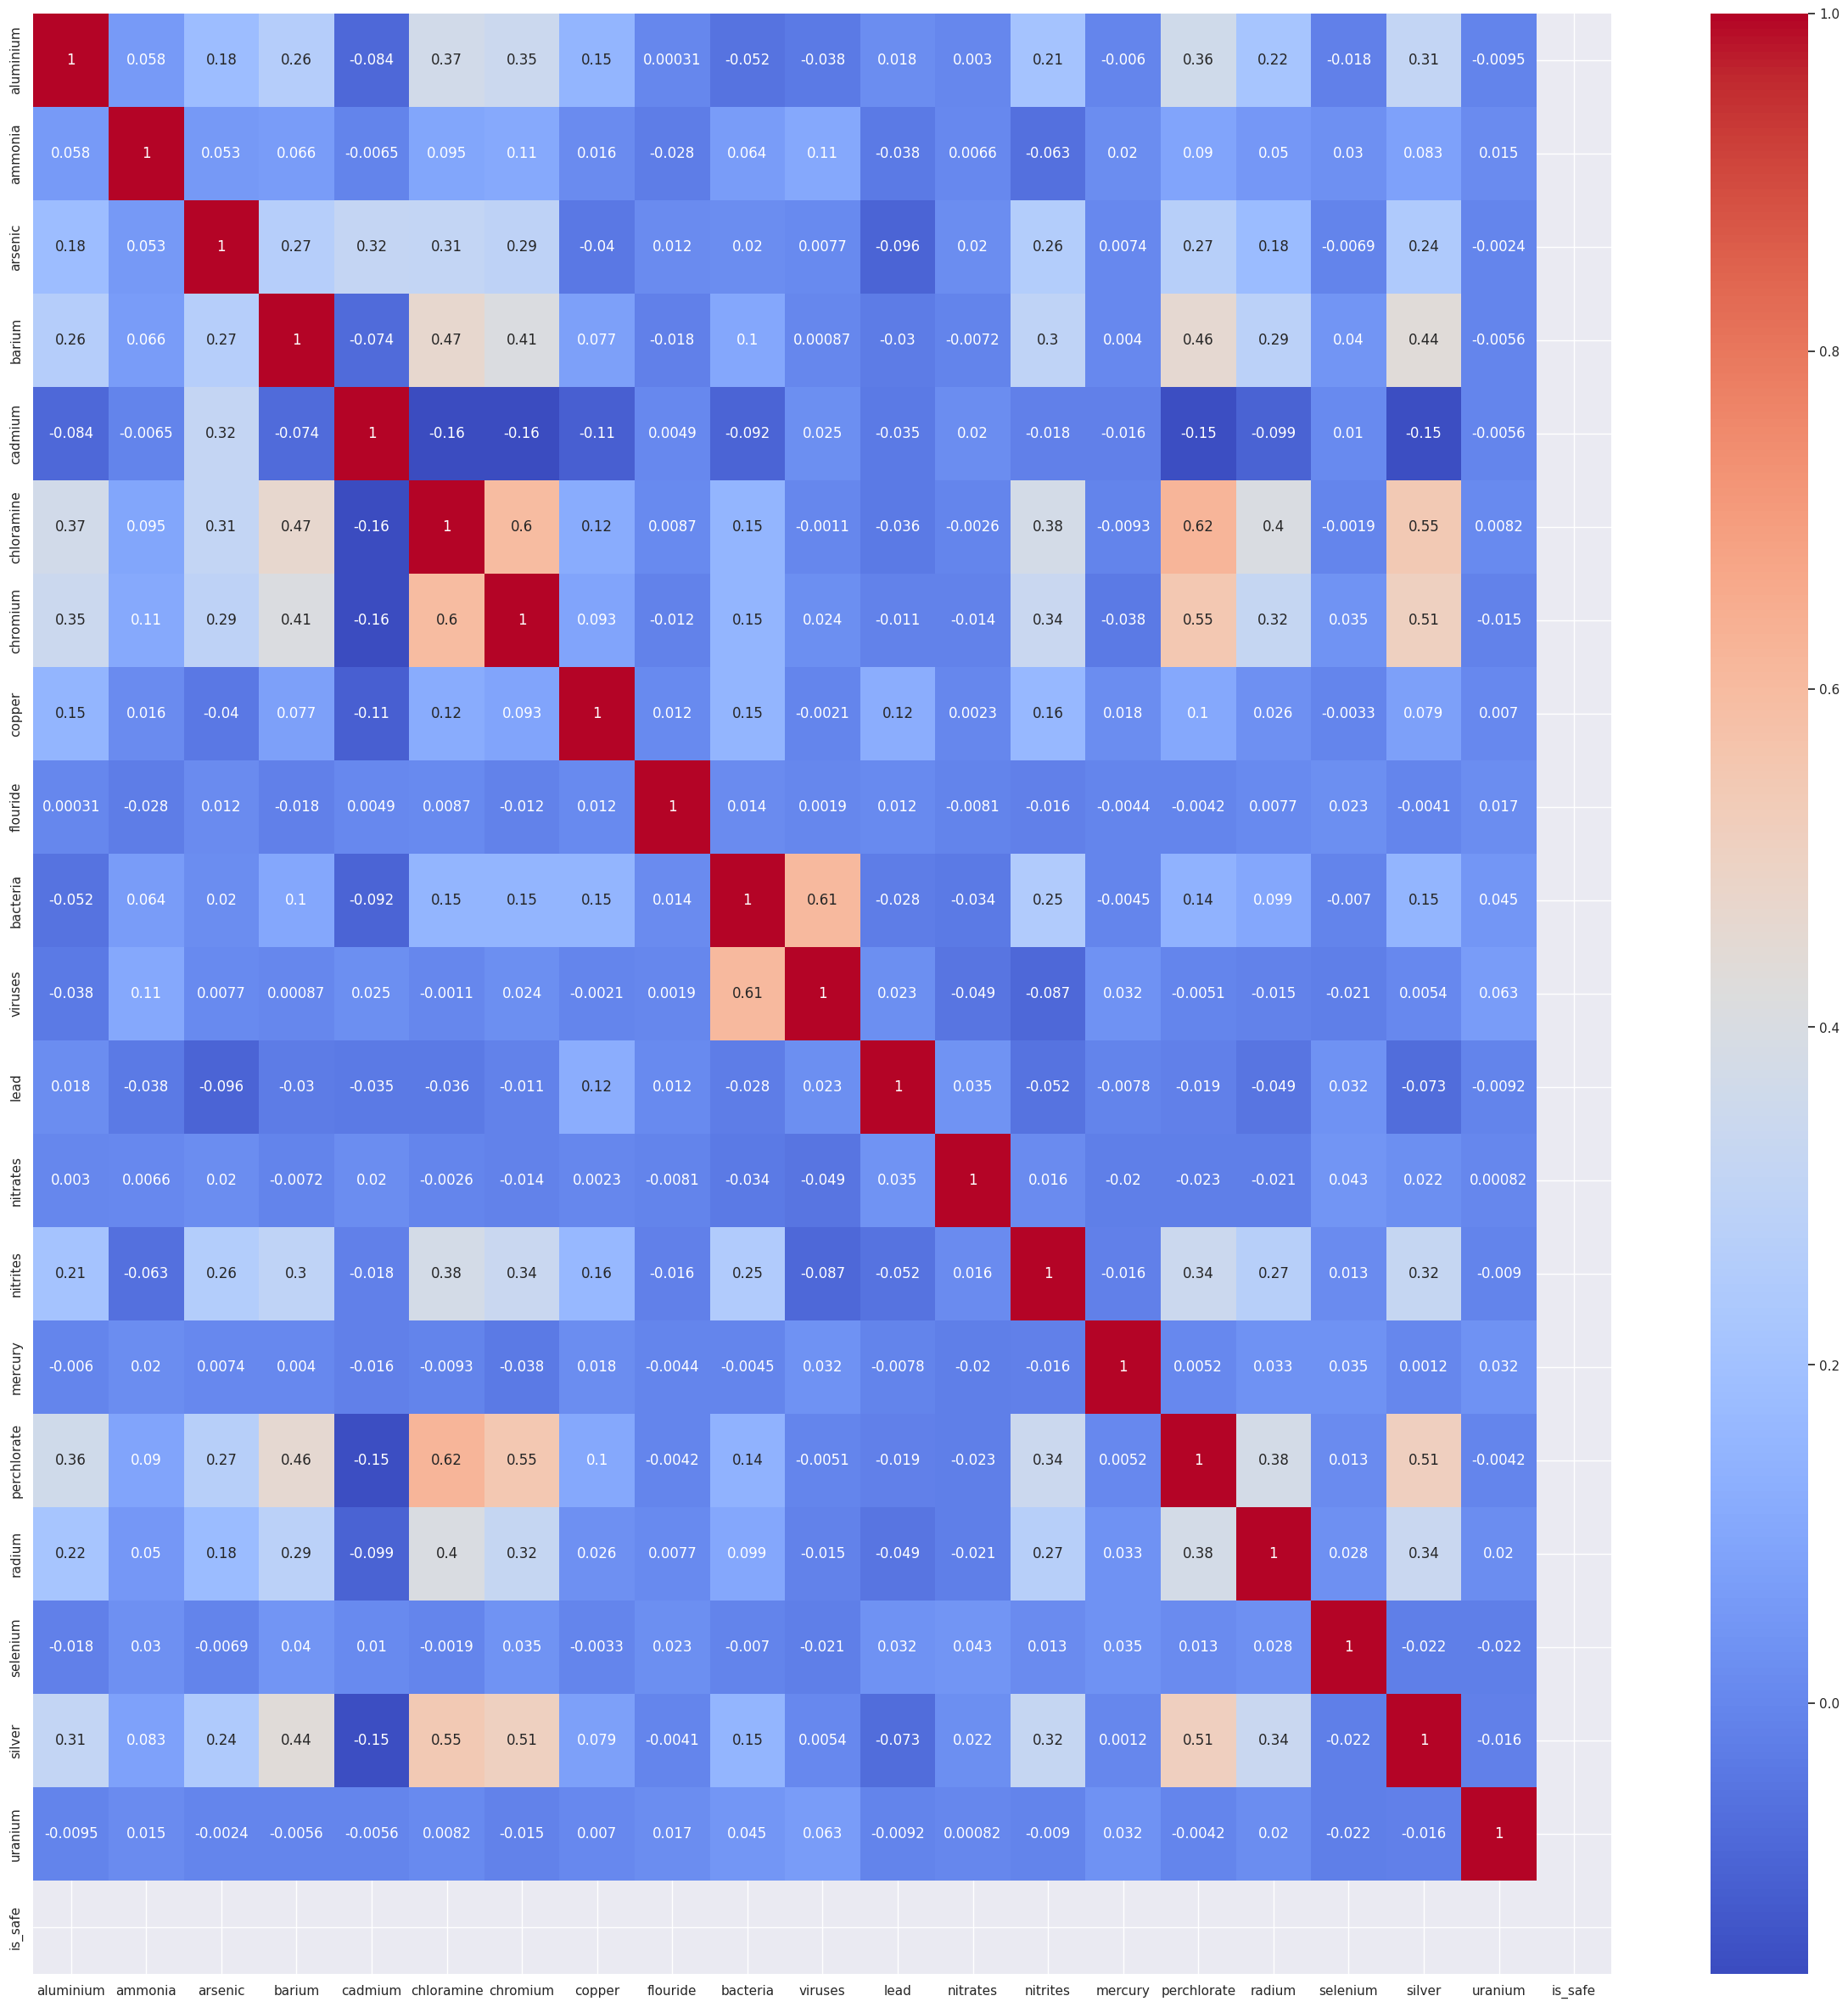

In [ ]:
ax = sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
sns.set (rc = {'figure.figsize':(50,50)})

# **Conclusion**

Viruses and bacteria have the highest correlation with water quality (r = 0.62)

Pechlorate and chloramine had the second best correlation with water quality (r = 0.59)

Radium, nitrates, and arsenic are in the middle, with correlation coefficients ranging from (r = 0.36-0.38)

Cadmium has the lowest correlation (r = -0.26)
